<a href="https://colab.research.google.com/github/untimation/AIStudy25/blob/master/02_02_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 올바른 결과를 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거친다.
# 전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고
# 표준점수로 특성의 스케일 변환 해보자.

# 만약 길이가 25cm이고 무게가 150g이면 도미인데, 빙어로 결론이 나왔다.!!!
# 이 원인을 찾아보고 개선해보자.

# 전처리 데이터 앞쪽 35개는 도미(1), 뒤쪽 14개는 빙어(0)  -> 총 49개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [4]:
# 전에는 파이썬 리스트를 for문과 zip을 이용해서 배열로 만들었는데
# 넘파이에는 이 기능이 내장되어 있는 메서드가 있다.
import numpy as np      # 넘파이 배열용 파이썬 라이브러리
np.column_stack(([1,2,3,],[4,5,6])) # .column(열) stack(쌓는다)
#                 길이용, 무게용 -> 변환

array([[1, 4],
       [2, 5],
       [3, 6]])

In [6]:
fish_data = np.column_stack((fish_length, fish_weight))
# fish_data 변수에 2차원 배열을 넣는다 ( 앞쪽:길이, 뒤쪽:무게 )
print(fish_data[:5])    # 앞쪽 5개를 미리보기 해본다. 0~4번 인덱스 확인

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [8]:
# target 1이면 도미, 0이면 빙어의 정답을 만들기 [1]*35 + [0]*14
# 정답파일을 생성한다.
print(np.ones(5)) # 1로 채우기 테스트

[1. 1. 1. 1. 1.]


In [10]:
print(np.zeros(10)) # 0으로 채우기 테스트

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))
# .concatenate() 첫번째 차원을 따라 배열을 연결
# 1차원배열 (1이 35개:도미, 0이 14개:빙어)
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

print(train_input.shape, test_input.shape)
# train_input 훈련용 입력값
# test_input 테스트용 입력값
# train_target 훈련용 정답
# test_target 테스트용 정답
# stratify : 타겟값을 넣어줌(target의 class 비율을 유지한채 데이터셋을 split함)
# random_state : 시드값을 42로 지정하고 랜덤 적용(수업용)

# 결과 : 랜덤하게 처리하면서 훈련용(36객체, 2특성) 테스트용(13객체, 2특성)

(36, 2) (13, 2)


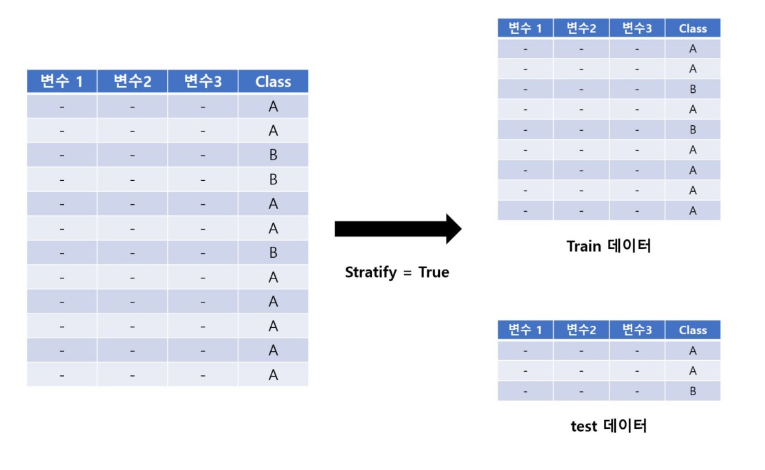

In [14]:
print(train_target.shape, test_target.shape) # 결과가 튜플로 나옴

(36,) (13,)


In [16]:
print(train_target)
# 훈련용 정답 데이터

[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


In [18]:
print(test_target)
# 테스트용 검증 데이터 -> 결론 : 적절하게 분배됨
# =============== 전처리 데이터 ======================끝

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
from sklearn.neighbors import KNeighborsClassifier # k-이웃 근접 알고리즘

kn = KNeighborsClassifier() # 객체 생성
kn.fit(train_input, train_target)   # 훈련시작! (트레이닝입력, 트레이닝정답)

KNeighborsClassifier()

In [21]:
kn.score(test_input, test_target)   # 평가시작! (테스트입력, 테스트정답)

1.0

In [23]:
print(kn.predict([[25,150]]))       # 여기도 마찬가지로 0:빙어로 나옴

[0.]


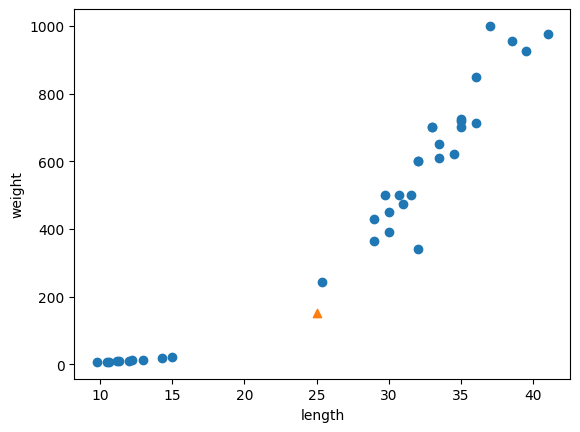

In [24]:
# 그래프로 확인해보자.

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker='^')
# 마커 종류 변경 https://pyvisuall.tistory.com/39
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

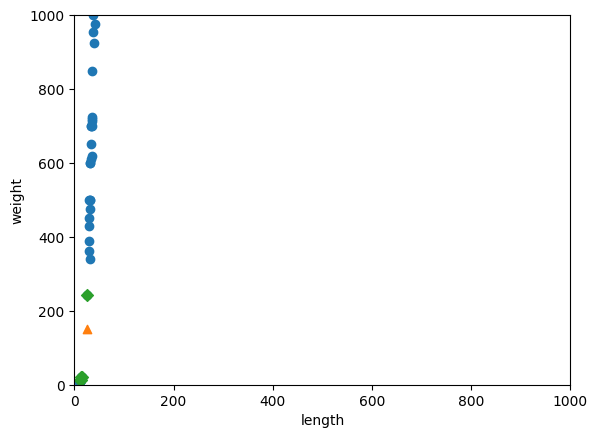

In [25]:
# 결론 x와 y축에 비율이 다르기에 정확한 그래프로 판단할 수 없다.
# k-최근접 이웃 알고리즘은 주변에 있는 5개를 보기 때문에 좀더 알아볼 필요가 있다.

distances, indexes= kn.kneighbors([[25,150]])
# 내가 알고싶은 값의 거리와 인덱스를 알아보자.
plt.scatter(train_input[:,0], train_input[:,1])    # 입력데이터 값
plt.scatter(25,150,marker='^')                      # 알고 싶은 값
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # 이웃에 값
plt.xlim((0,1000))      # x축에 범위를 0~1000 까지로 지정
plt.ylim((0,1000))      # y축에 범위를 0~1000 까지로 지정
plt.xlabel("length")
plt.ylabel("weight")
plt.show()
# 결론 녹색으로 25,150에 대한 이웃이 누군지 파악됨
# 축의 값범위에 위험성을 알고가자!!!

In [27]:
print(train_input[indexes]) # k-최근접 알고리즘에 근접한 5개의 값 (도미1. 빙어4)
# [[[ 25.4 242. ] -> 도미
#   [ 15.   19.9] -> 빙어
#   [ 14.3  19.7] -> 빙어
#   [ 13.   12.2] -> 빙어
#   [ 12.2  12.2] -> 빙어 ]] -> 그래서 0으로 결과가 나왔음.

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [29]:
print(train_target[indexes])    # 도미 1개 빙어 4개

[[1. 0. 0. 0. 0.]]


In [30]:
print(distances)    # 이웃간의 거리 출력

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


In [32]:
# 두 특성(길이,무게)의 값이 놓인 범위가 매우다름 -> 두 특성의 스케일이 다르다고 함
# 특성간의 스케일이 다른 일은 흔히 발생한다. (결론. 스케일을 맞춰야 함)
# 특성값을 일정한 기준으로 맞춰주어야 한다.(데이터 전처리라고 함)

# 평균 구해보기 (가장 널리 사용하는 전처리 방법은 : 표준점수, z점수라고 함)
# 표준 점수는 각 특성값이 평균에서 표준편차의 몇배만큼 떨어져 있는지를 나타냄
# 분산은 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내어 구함
# 표준편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타냄
# 표준점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값

mean=np.mean(train_input, axis=0)   # 평균을 구한다. axis : 중심선
std=np.std(train_input, axis=0)     # 표준편차를 구한다.
# train_input -> 36개의 요소와 2개의 특성을 가짐 (36,2) 크기의 배열임
# 행을 따라 각 열의 통계 값을 계산함
print(mean, std)
# [ 27.29722222 454.09722222] [  9.98244253 323.29893931]
#   길이에 평균  무게의 평균     길이에편차 무게의 편차

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


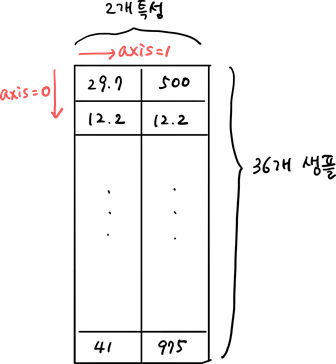

In [33]:
# 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수를 변환
train_scaled = (train_input - mean) / std # 표준점수 공식(암기)

# 원본데이터에서 평균을 빼고 표준편차로 나눔
# 넘파이는 train_input의 모든 행에서 mean에 있는 두 평균값을 빼줌
# std에 있는 두 표준편차를 다시 모든 행에 적용 (브로드캐스팅)

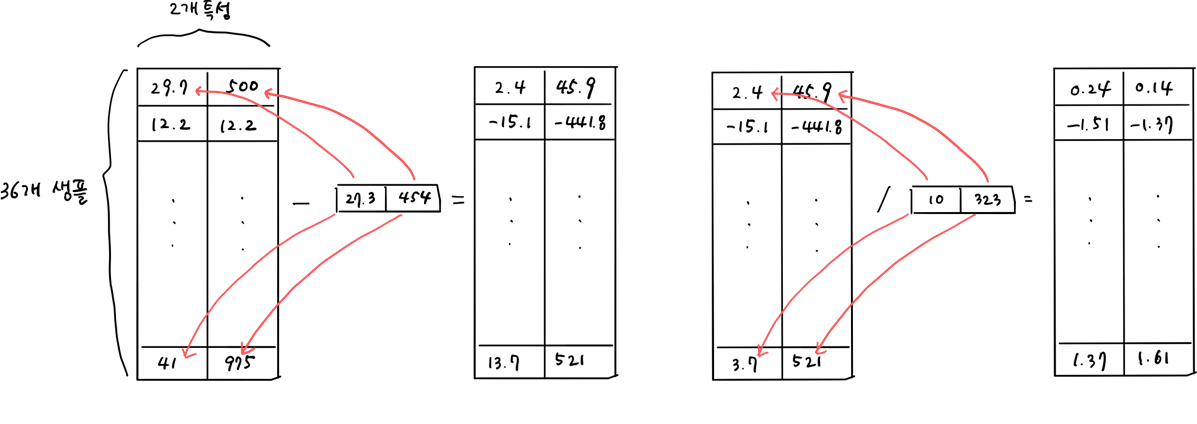

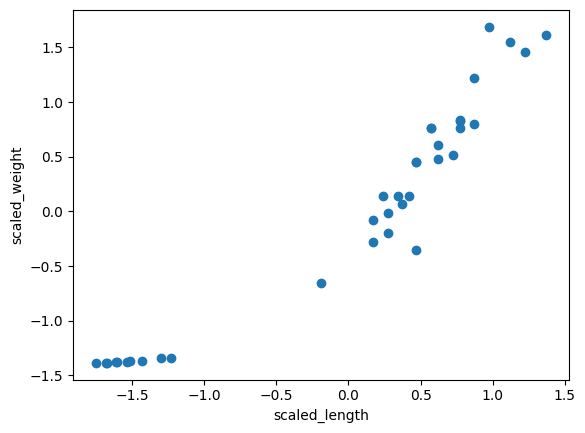

In [35]:
# 위 공식대로 적용을 하면 41의 길이와 975의 무게의 스케일이 1.37, 1.61로 표준화됨

# 전처리 데이터를 이용해서 모델 훈련 시키기

plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.xlabel("scaled_length")
plt.ylabel("scaled_weight")
plt.show()
# 차트의 범위가 x축은 -2.0 ~ 1.5 , y축은 -1.5 ~ 1.5 사이로 비슷해진다.(스케일 조정성공)
# 전에 만들었던 표준점수 이전 차트랑 비교하면 비슷한 차트가 보인다.

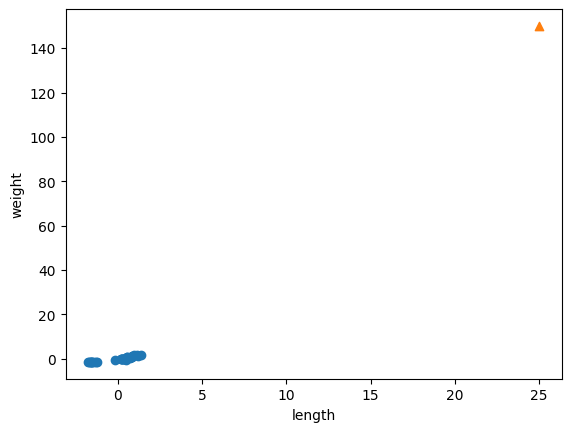

In [37]:
# 전처리 데이터를 이용해서 모델 훈련 시키기

plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(25,150, marker='^') # 알고 싶은 추가데이터
plt.xlabel("length")
plt.ylabel("weight")
plt.show() # 오른쪽 맨 꼭대기에 수상한 샘플이 생김
# 전처리된 데이터는 표준점수를 위해서 값이 축소 되어 있는데
# 알고자 하는 값은 표준점수화가 안됨
# 훈련세트를 평균으로 빼고 표준편차로 나누어 주었기 때문에 값의 범위가 달라짐

표준점수로 변환된 25,150 : [-0.23012627 -0.94060693]


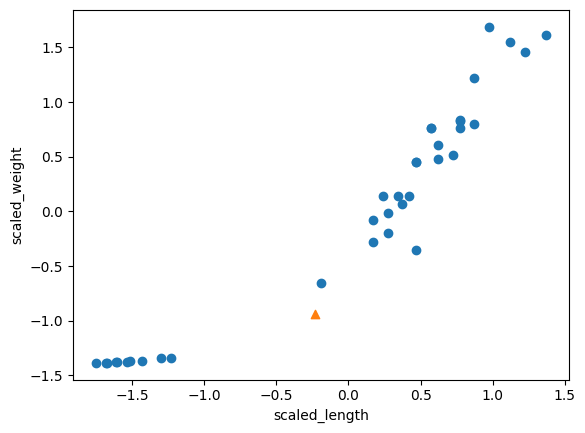

In [38]:
# 동일한 기준으로 샘플 변환하고 출력
new = ([25,150]-mean) / std
print(f"표준점수로 변환된 25,150 : {new}" )

plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0],new[1], marker='^') # 배열로 생성하고 표준편차 적용 후 추가데이터
plt.xlabel("scaled_length")
plt.ylabel("scaled_weight")
plt.show()
# x, y축의 범위가 비슷함 (-1.5 ~ 1.5사이값)

In [40]:
# 훈련 시작!!!
kn.fit(train_scaled , train_target) # 스케일 조정된 입력값으로 타켓을 훈련

KNeighborsClassifier()

In [42]:
# 테스트 진행전 표준점수로 변환해야 한다.
test_scaled = (test_input - mean) / std # 표준점수화

In [47]:
kn.score=(test_scaled, test_target)     # 평가 진행

new = ([25,150]-mean) / std
print(kn.predict([new]))    # 25,150짜리 결과를 보면
# [1.] 도미로 예측 성공

[1.]


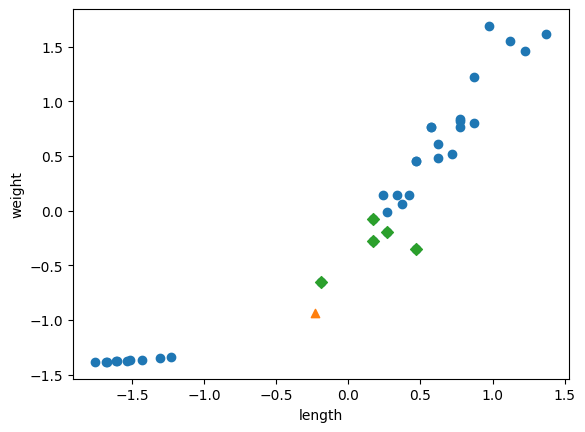

In [49]:
# kneighbors()로 최근접 이웃을 구한 다음 산점도로 그려봄
distances, indexes= kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:, 1])
plt.scatter(new[0],new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()